In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer


In [37]:
final_df = pd.read_csv('pitchfork.csv')

In [38]:
# Checking for missing values in the dataset
missing_values = final_df.isnull().sum()

# Inspecting the types of each column to identify categorical variables
column_types = final_df.dtypes

missing_values, column_types

(artist             1
 album              3
 genre           2303
 score              0
 date               0
 author             0
 role            3496
 review             2
 bnm                0
 link               0
 label             35
 release_year     410
 dtype: int64,
 artist           object
 album            object
 genre            object
 score           float64
 date             object
 author           object
 role             object
 review           object
 bnm               int64
 link             object
 label            object
 release_year    float64
 dtype: object)

In [39]:
# Handling Missing Values
final_df['genre'] = final_df['genre'].fillna('unknown')

# Deleting rows with missing values in 'artist' and 'album'
final_df.dropna(subset=['artist', 'album'], inplace=True)

# Dropping specified columns
final_df.drop(columns=['review', 'role', 'label', 'link','date'], inplace=True)


In [40]:
# Converting 'release_year' to integer
final_df['release_year'] = final_df['release_year'].astype('Int64')

# Display the first few rows of the modified dataframe
final_df.head()

,artist,album,genre,score,author,bnm,release_year
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,Andy Beta,0,2018
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,Chal Ravens,0,2019
2,Jorge Velez,Roman Birds,Electronic,7.9,Philip Sherburne,0,2019
3,Chandra,Transportation EPs,Rock,7.8,Andy Beta,0,2018
4,The Chainsmokers,Sick Boy,Electronic,3.1,Larry Fitzmaurice,0,2018


In [41]:
final_df['rating_avg_user'] = final_df.groupby('author')['score'].transform('mean')

In [42]:
final_df['rating_avg_artist'] = final_df.groupby('artist')['score'].transform('mean')

In [43]:
final_df['rating_avg_genres_user'] = final_df.groupby(['author','genre'])['score'].transform('mean')

In [44]:
final_df['rating_avg_genres'] = final_df.groupby('genre')['score'].transform('mean')

In [45]:
final_df.head()

,artist,album,genre,score,author,bnm,release_year,rating_avg_user,rating_avg_artist,rating_avg_genres_user,rating_avg_genres
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,Andy Beta,0,2018,7.464324,7.114286,7.190909,6.995788
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,Chal Ravens,0,2019,7.257895,7.200000,7.233333,7.090081
2,Jorge Velez,Roman Birds,Electronic,7.9,Philip Sherburne,0,2019,7.514697,7.900000,7.473418,7.090081
3,Chandra,Transportation EPs,Rock,7.8,Andy Beta,0,2018,7.464324,7.800000,7.190909,6.995788
4,The Chainsmokers,Sick Boy,Electronic,3.1,Larry Fitzmaurice,0,2018,6.946429,3.600000,6.997561,7.090081


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# One-hot encoding for genre
categorical_features = ['genre']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

final_df

,artist,album,genre,score,author,bnm,release_year,rating_avg_user,rating_avg_artist,rating_avg_genres_user,rating_avg_genres
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,Andy Beta,0,2018,7.464324,7.114286,7.190909,6.995788
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,Chal Ravens,0,2019,7.257895,7.200000,7.233333,7.090081
2,Jorge Velez,Roman Birds,Electronic,7.9,Philip Sherburne,0,2019,7.514697,7.900000,7.473418,7.090081
3,Chandra,Transportation EPs,Rock,7.8,Andy Beta,0,2018,7.464324,7.800000,7.190909,6.995788
4,The Chainsmokers,Sick Boy,Electronic,3.1,Larry Fitzmaurice,0,2018,6.946429,3.600000,6.997561,7.090081
...,...,...,...,...,...,...,...,...,...,...,...
20868,The Pleased,Don't Make Things,Rock,7.7,Amanda Petrusich,0,2003,7.395074,7.700000,7.353153,6.995788
20869,Electric Six,Fire,"Electronic,Rock",4.0,Eric Carr,0,2003,6.682031,5.340000,5.810000,6.624906
20870,Anti-Pop Consortium,Antipop Vs. Matthew Shipp,"Electronic,Rap",7.2,Julianne Escobedo Shepherd,0,2003,7.125581,7.160000,7.200000,7.151923
20871,"Damon & Naomi, Kurihara",Song to the Siren: Live,Rock,4.9,Ryan Kearney,0,2002,6.731915,4.900000,6.706667,6.995788


<ipython-input-46-e7d768a8cade>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr().abs(), annot=True)


<Axes: >

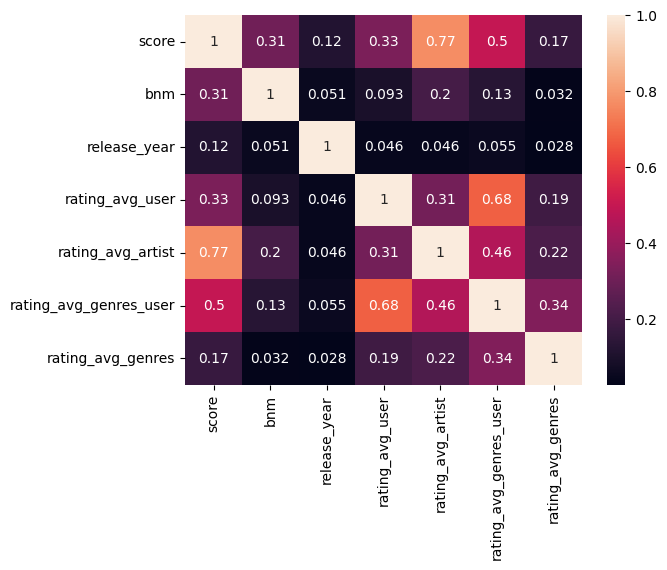

In [46]:
import seaborn as sns
sns.heatmap(final_df.corr().abs(), annot=True)


In [57]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['score', 'album', 'genre', 'release_year','author','artist'], axis=1)
y = final_df['score']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def define_performance(y,predict,model,train):
    print('------'+model+' in '+train+' dataset------')
    print('The MAE in the dataset is %.3f '%mean_absolute_error(y,predict))
    print('The MSE in the training dataset is %.3f '%mean_squared_error(y,predict))
    print('The RMSE in the training dataset is %.3f '%mean_squared_error(y,predict,squared=False))

In [60]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

models = [
    LinearRegression(),
    Ridge(),
    DecisionTreeRegressor()]

for model in models:
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)

    define_performance(y_train,model.predict(X_train.values),model=f"Regressor: {model}",train='train')
    print(f"Regressor: {model}\nR^2 score: {r2}")
    print('  ')
    define_performance(y_test,model.predict(X_test.values),model=f"Regressor: {model}",train='test')
    print('  ')

------Regressor: LinearRegression() in train dataset------
The MAE in the dataset is 0.491 
The MSE in the training dataset is 0.576 
The RMSE in the training dataset is 0.759 
Regressor: LinearRegression()
R^2 score: 0.6540818879489187
  
------Regressor: LinearRegression() in test dataset------
The MAE in the dataset is 0.486 
The MSE in the training dataset is 0.540 
The RMSE in the training dataset is 0.735 
  
------Regressor: Ridge() in train dataset------
The MAE in the dataset is 0.491 
The MSE in the training dataset is 0.576 
The RMSE in the training dataset is 0.759 
Regressor: Ridge()
R^2 score: 0.6540786418311897
  
------Regressor: Ridge() in test dataset------
The MAE in the dataset is 0.486 
The MSE in the training dataset is 0.540 
The RMSE in the training dataset is 0.735 
  
------Regressor: DecisionTreeRegressor() in train dataset------
The MAE in the dataset is 0.135 
The MSE in the training dataset is 0.140 
The RMSE in the training dataset is 0.374 
Regressor: De

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Decisio

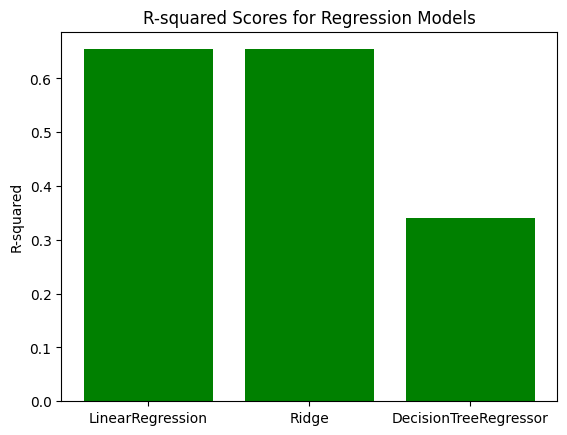

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = [LinearRegression(), Ridge(), DecisionTreeRegressor()]

# Train and evaluate the models
r2_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
    r2_scores.append(r2)

# Plot the bar graph
plt.bar(range(len(models)), r2_scores, color='green')
plt.xticks(range(len(models)), [str(model).split("(")[0] for model in models])
plt.ylabel('R-squared')
plt.title('R-squared Scores for Regression Models')
plt.show()